In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import lda#discriminant_analysis
from patsy import dmatrices
import math
from pandas import DataFrame

/home/kavya-a/anaconda3/lib/python3.5/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [2]:
%matplotlib inline

In [3]:
plt.style.use('ggplot')

In [4]:
plt.rcParams['figure.figsize'] = (13,8)

In [5]:
df=pd.read_csv("./winequality-red.csv")

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.loc[df.quality > 5, 'category'] = 1
df.loc[df.quality <= 5, 'category'] = 0

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0


In [9]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.218072


In [10]:
df_train=df.iloc[:500,]
df_test=df.iloc[500:,]

In [11]:
X = DataFrame()
X2 = DataFrame()
X3 = DataFrame()
y=df_train['category']
X['alcohol']=df_train['alcohol']
X['sulphates']=df_train['sulphates']
y2=df_test['category']
X2['alcohol']=df_test['alcohol']
X2['sulphates']=df_test['sulphates']
y3=df['category']
X3['alcohol']=df['alcohol']
X3['sulphates']=df['sulphates']


In [12]:
#model = LogisticRegression()
model = RandomForestClassifier(n_estimators=400)
#model = tree.DecisionTreeClassifier(max_depth = 100)
#model = lda.LDA()
X2

,alcohol,sulphates
500,9.0,0.65
501,12.0,0.85
502,12.0,0.85
503,10.9,1.04
504,10.8,1.05
505,12.5,0.78
506,10.8,1.02
507,9.5,0.71
508,10.2,0.63
509,11.4,0.68


In [13]:
model = model.fit(X, y)

In [14]:
model.score(X,y)

0.94599999999999995

In [15]:
model.score(X2,y2)

0.65332120109190173

In [16]:
#p=DataFrame(list(zip(df['quality'],df['category'],df['category']*0)),columns=['quality','category','probability'])
p=DataFrame()
p['alcohol']=df['alcohol']
p['sulphates']=df['sulphates']
p['category']=df['category']

In [17]:
p

,alcohol,sulphates,category
0,9.4,0.56,0.0
1,9.8,0.68,0.0
2,9.8,0.65,0.0
3,9.8,0.58,1.0
4,9.4,0.56,0.0
5,9.4,0.56,0.0
6,9.4,0.46,0.0
7,10.0,0.47,1.0
8,9.5,0.57,1.0
9,10.5,0.80,0.0


In [18]:
#model.coef_

In [19]:
model.predict_proba(X3)[:,0]

array([ 0.999375  ,  0.53724405,  0.98208333, ...,  0.38      ,
        0.21104167,  0.0675    ])

In [20]:
p['prob_0']=model.predict_proba(X3)[:,0]
p['prob_1']=model.predict_proba(X3)[:,1]
p['predicted']=model.predict(X3)

In [21]:
p

,alcohol,sulphates,category,prob_0,prob_1,predicted
0,9.4,0.56,0.0,0.999375,0.000625,0.0
1,9.8,0.68,0.0,0.537244,0.462756,0.0
2,9.8,0.65,0.0,0.982083,0.017917,0.0
3,9.8,0.58,1.0,0.327800,0.672200,1.0
4,9.4,0.56,0.0,0.999375,0.000625,0.0
5,9.4,0.56,0.0,0.999375,0.000625,0.0
6,9.4,0.46,0.0,0.992667,0.007333,0.0
7,10.0,0.47,1.0,0.662679,0.337321,0.0
8,9.5,0.57,1.0,0.316500,0.683500,1.0
9,10.5,0.80,0.0,0.677744,0.322256,0.0


In [22]:
#ggplot(subset(p, quality in seq(4, 8, by=1))) + geom_point(aes(x = quality, y = probability, color = \
#factor(quality)), 
 #            size = 3, alpha = 1) + ggtitle("Quality vs. Purchase Probability at Various Prices") +  \
    #myScales +   scale_color_discrete("quality")

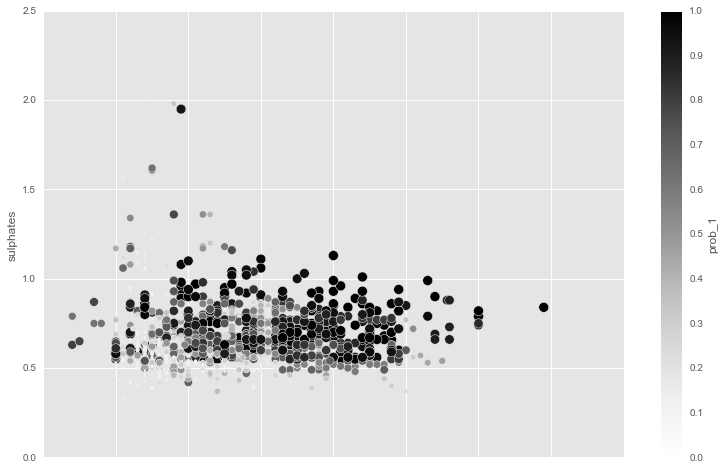

In [23]:
p.plot.scatter(x='alcohol', y='sulphates', c='prob_1', s=p['prob_1']*100)
#plot.xlim(0,10)

"Z = model.predict(X3)\nxx=X3['alcohol']\nyy=X3['sulphates']\nZ = Z.reshape(xx.shape)\nax.contour(xx, yy, Z, cmap=plt.cm.Paired)"

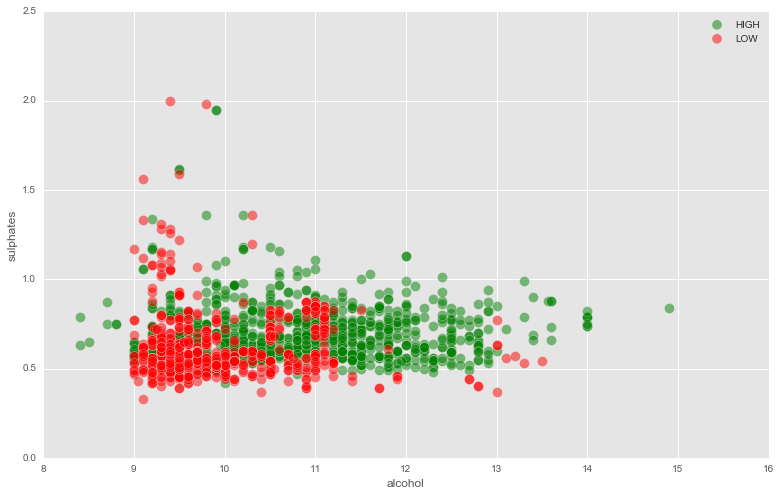

In [24]:
#using a scatter plot to depict the predicted qualities
ax = p[p.predicted == 1].plot(x="alcohol", y="sulphates", kind="scatter", color="green", label="HIGH", \
                                             s=100, alpha=0.5)
p[p.predicted == 0].plot(x="alcohol", y="sulphates", kind="scatter", color="red", label="LOW", \
                                        s=100, alpha=0.5, ax=ax)
"""Z = model.predict(X3)
xx=X3['alcohol']
yy=X3['sulphates']
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, cmap=plt.cm.Paired)"""

In [25]:
def meshj(p):
    h = .02  # step size in the mesh
    x_min, x_max = p['alcohol'].min() , p['alcohol'].max() + 1
    y_min, y_max = p['sulphates'].min() , p['sulphates'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    return xx, yy

In [26]:
xx, yy = meshj(p)
yy.shape

(134, 375)

In [27]:
xx.ravel().shape

(50250,)

In [28]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
p_plt=DataFrame()
p_plt['xx'] = xx.ravel()
p_plt['yy'] = yy.ravel()
p_plt['zz'] = Z
p_plt['proba_1'] = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,0]
Z.shape

(50250,)

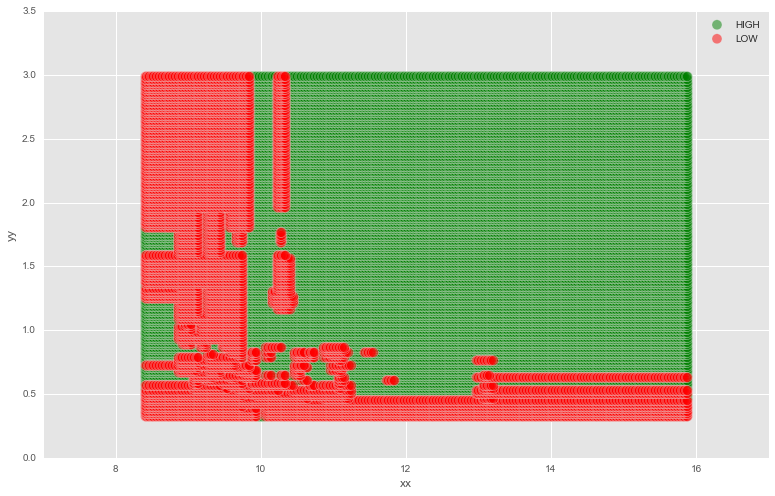

In [29]:
ax = p_plt[p_plt.zz == 1].plot(x="xx", y="yy", kind="scatter", color="green", label="HIGH", \
                                             s=100, alpha=0.5)
p_plt[p_plt.zz == 0].plot(x="xx", y="yy", kind="scatter", color="red", label="LOW", \
                                        s=100, alpha=0.5, ax=ax)

In [30]:
p_boundary = DataFrame()
prob_boundary = 0.49
count = 0
for prob_val in p_plt['proba_1']:
    if (prob_val > prob_boundary and prob_val < 0.50):
        #print(prob_val)
        #p_boundary = 2
        count = count + 1
        
print(count)

209


In [31]:
#p_boundary=p_plt.copy(deep = False)#.iloc[0]=p_plt.iloc[3]

In [32]:
#p_boundary

In [33]:
#p_boundary=p_plt.iloc[3]

In [37]:
#p_boundary

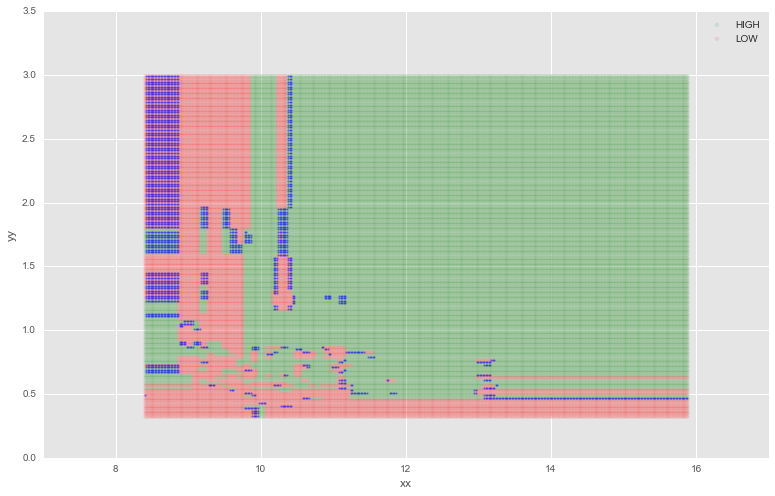

In [38]:
ax = p_plt[p_plt.zz == 1].plot(x="xx", y="yy", kind="scatter", color="green", label="HIGH", \
                                             s=20, alpha=0.1)
p_plt[p_plt.zz == 0].plot(x="xx", y="yy", kind="scatter", color="red", label="LOW", \
                                        s=20, alpha=0.1, ax=ax)
p_boundary = DataFrame()
prob_boundary = 0.47
count = 0
loop_var = 0
for prob_val in p_plt['proba_1']:
    loop_var = loop_var + 1
    if (prob_val >= prob_boundary and prob_val <= 0.53):
        count = count + 1
        ax.plot([p_plt.iloc[loop_var]['xx']],[p_plt.iloc[loop_var]['yy']],'bo', alpha=.5, ms=2)
#p[p.predicted == 1].plot(x="alcohol", y="sulphates", kind="scatter", color="green", label="HIGH", \
 #                                          s=40, alpha=1, ax = ax)
#p[p.predicted == 0].plot(x="alcohol", y="sulphates", kind="scatter", color="red", label="LOW", \
 #                                      s=40, alpha=1, ax = ax)

In [36]:
p_plt[(p_plt.proba_1>0.47) & (p_plt.proba_1<0.53)].count()

xx         1850
yy         1850
zz         1850
proba_1    1850
dtype: int64